In [1]:
from CBIR_Scripts.BayesianRF import *

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
source_folder = '../playground/RSSCN7'
dest_folder = '../playground/query_images'
not_indexed = os.listdir(dest_folder)

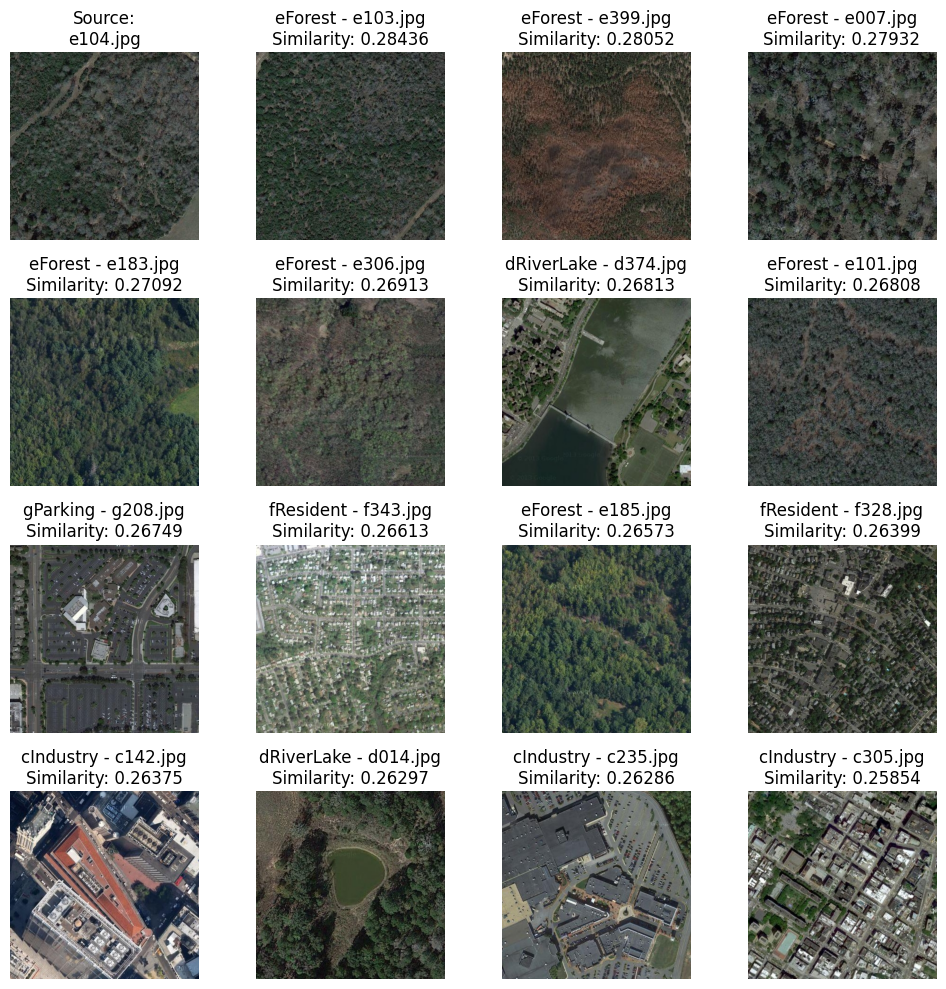

<Figure size 640x480 with 0 Axes>

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 18 seconds.


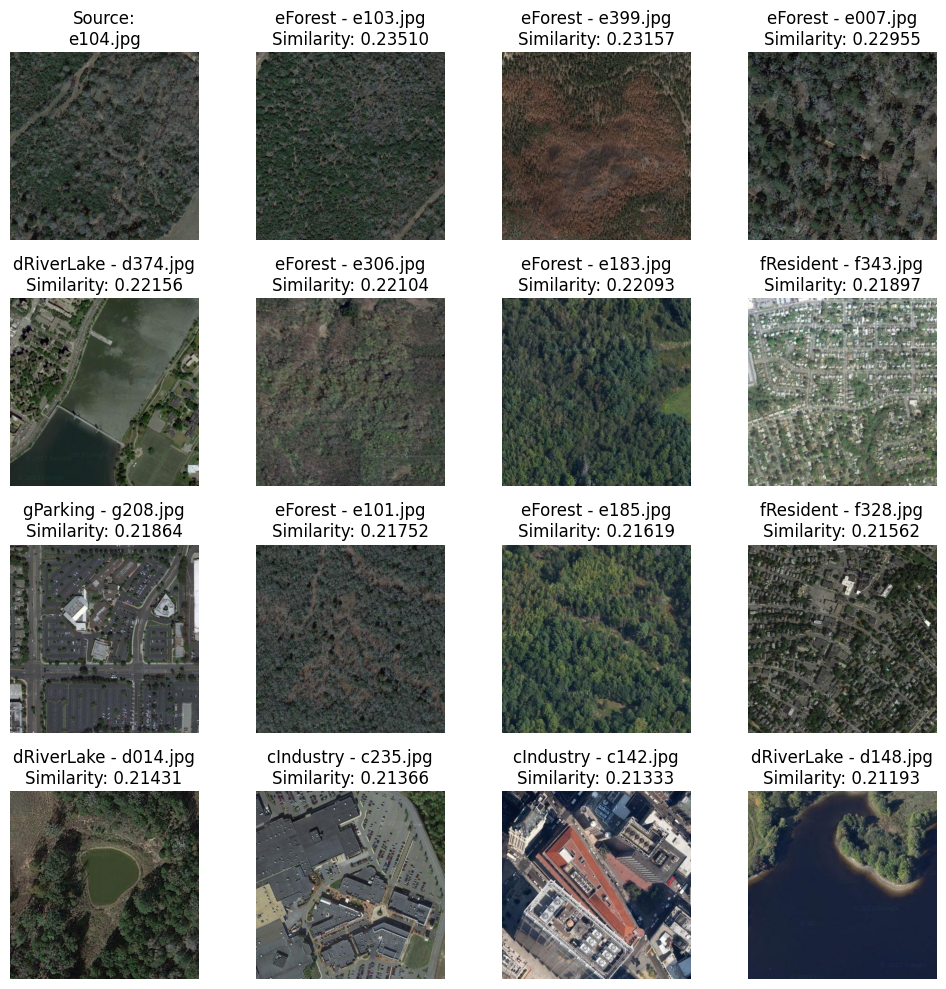

<Figure size 640x480 with 0 Axes>

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [weights]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 18 seconds.


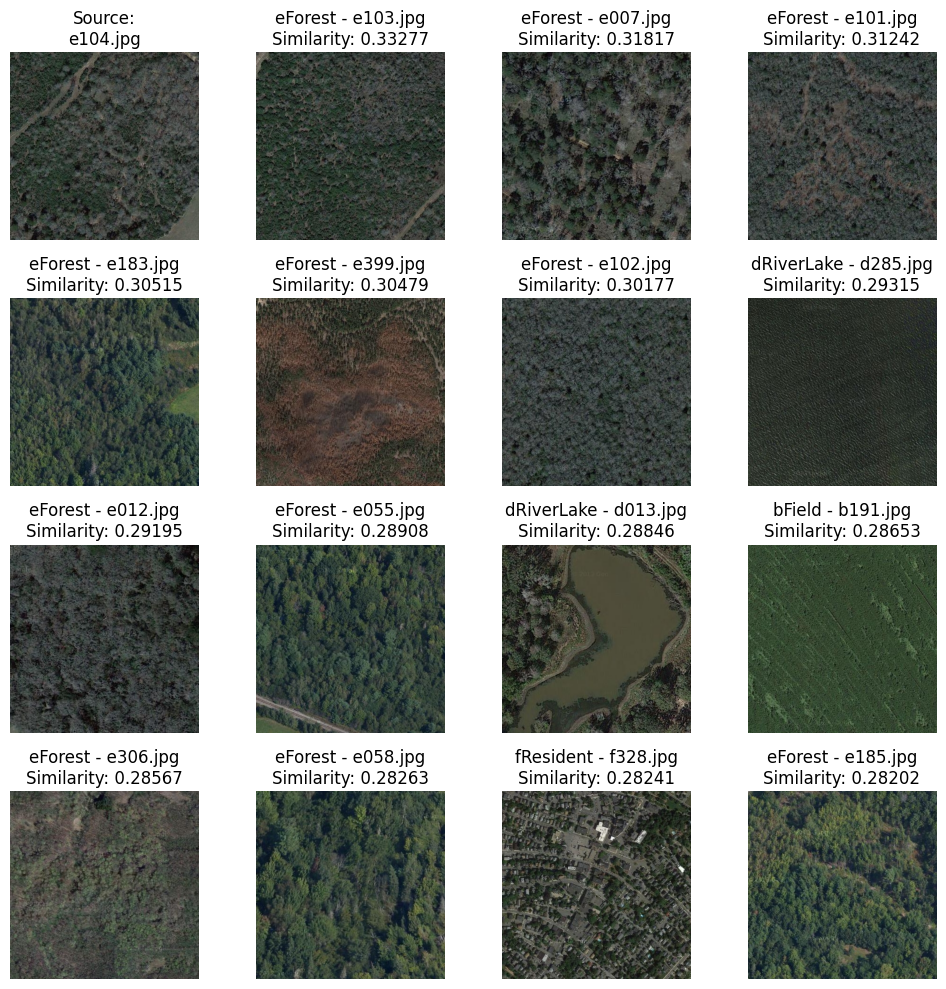

<Figure size 640x480 with 0 Axes>

In [9]:
weights = {
    'dominant_colors': 0.5,
    'color_histogram': 0.5,
    'fourier_descriptors': 0.5,
    'hu_moments': 0.5,
    'edge_histogram': 0.5,
    'gabor': 0.5
}

query_imgs = os.listdir(dest_folder)
rand_img = random.choice(query_imgs)
weights_history = RFSearch(weights, source_folder, dest_folder, rand_img, n=15)

In [10]:
print('Weights history:' + str(weights_history))

Weights history:[{'dominant_colors': 0.5, 'color_histogram': 0.5, 'fourier_descriptors': 0.5, 'hu_moments': 0.5, 'edge_histogram': 0.5, 'gabor': 0.5}, {'dominant_colors': 0.17833356246306498, 'color_histogram': 0.17828697646656633, 'fourier_descriptors': 0.1757203114242784, 'hu_moments': 0.18102655051023409, 'edge_histogram': 0.10785107344227642, 'gabor': 0.1787815256935798}, {'dominant_colors': 0.1770701249887992, 'color_histogram': 0.16879760301184926, 'fourier_descriptors': 0.17077767192108864, 'hu_moments': 0.059159761974286657, 'edge_histogram': 0.2424365935746801, 'gabor': 0.18175824452929626}]


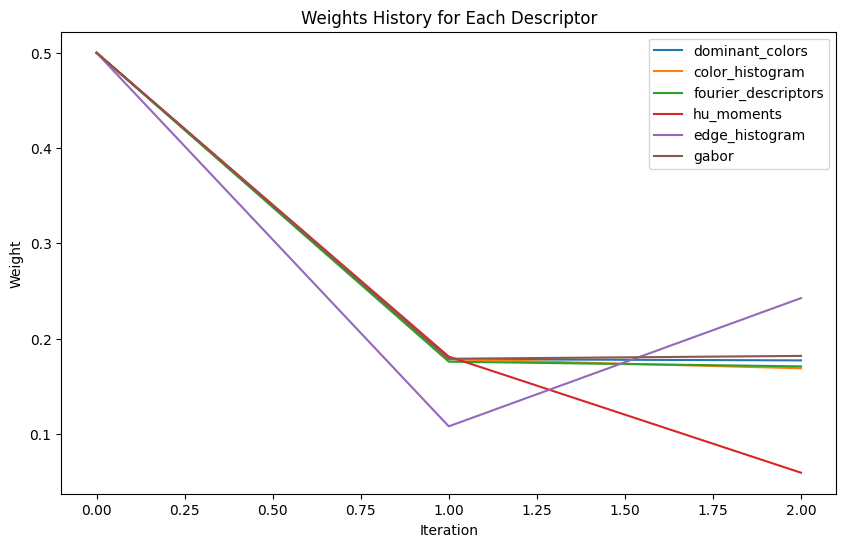

In [11]:
# Extract the history for each descriptor
history = {key: [w[key] for w in weights_history] for key in weights.keys()}

# Plot the history
plt.figure(figsize=(10, 6))
for descriptor, values in history.items():
    plt.plot(values, label=descriptor)

plt.xlabel('Iteration')
plt.ylabel('Weight')
plt.title('Weights History for Each Descriptor')
plt.legend()
plt.show()